In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Import Necessary Libraries

In [25]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix

## 2. Load the Dataset

In [6]:
# Importing the dataset
churn_df = pd.read_csv('drive/MyDrive/Terminal34/Churn_Modelling_Bank.csv')
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 3. Perform EDA

In [7]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
churn_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Axes: xlabel='Age', ylabel='Count'>

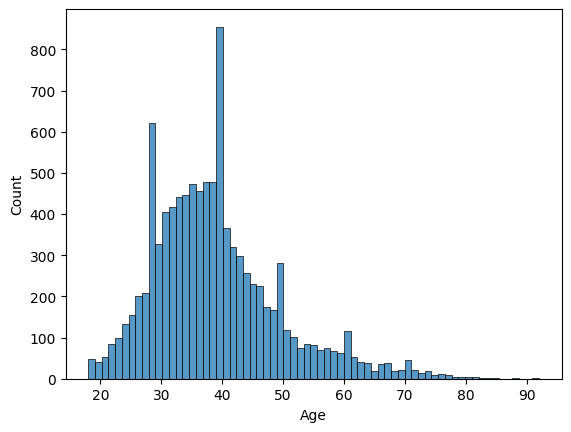

In [10]:
sns.histplot(data=churn_df, x='Age')

<Axes: xlabel='Balance', ylabel='Count'>

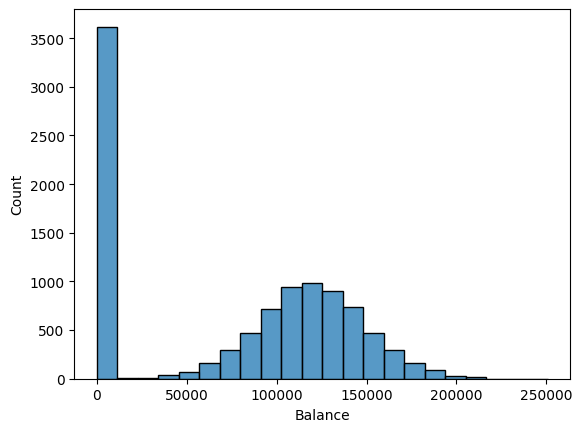

In [11]:
sns.histplot(data=churn_df, x='Balance')

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

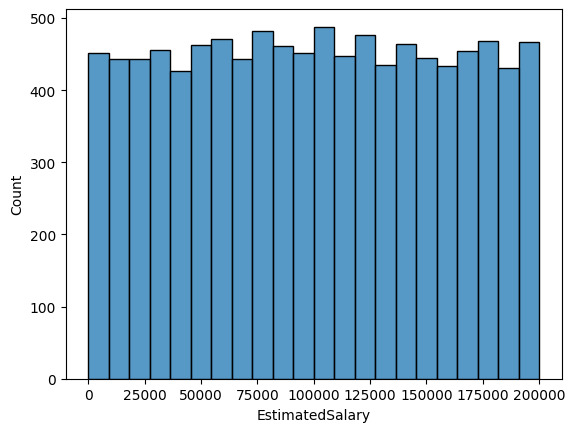

In [12]:
sns.histplot(data=churn_df, x='EstimatedSalary')

<Axes: xlabel='Exited', ylabel='count'>

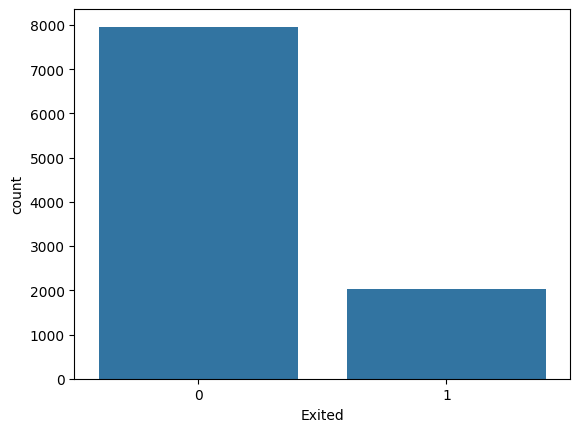

In [13]:
sns.countplot(data=churn_df, x='Exited')

## 4. Feature Engineering

In [15]:
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
churn_df_clean = churn_df.drop(
    ['RowNumber', 'CustomerId', 'Surname'], axis=1)
churn_df_clean.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype == 'object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [18]:
# Option 1: Convert object to integer
churn_df_clean = churn_df_clean.apply(lambda x: object_to_int(x))
churn_df_clean.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [19]:
# Option 2: Convert object to integer
churn_df_clean_one_hot = pd.get_dummies(prefix='Geo', data=churn_df_clean, columns=['Geography'])
churn_df_clean_one_hot.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_0,Geo_1,Geo_2
0,619,0,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [20]:
churn_df_clean_one_hot[
    ['Geo_0'	,'Geo_1'	,'Geo_2']] = churn_df_clean_one_hot[['Geo_0'	,'Geo_1'	,'Geo_2']].astype(int)
churn_df_clean_one_hot.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_0,Geo_1,Geo_2
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [97]:
X = churn_df_clean.drop(['Exited'], axis=1)
y = churn_df_clean['Exited']

In [98]:
# Feature scaling?
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

## 5. Split dataset

In [99]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=0)
X_train.shape, X_test.shape

((7000, 10), (3000, 10))

## 6. Initialize simple neural network

In [116]:
"""
model = Sequential([
    Dense(128, activation='relu', input_shape=(10,)),
    Dropout(rate=0.1),
    Dense(64, activation='relu'),
    Dropout(rate=0.1),
    Dense(32, activation='relu'),
    Dropout(rate=0.1),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
"""
model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 64)                704       
                                                                 
 dense_68 (Dense)            (None, 32)                2080      
                                                                 
 dense_69 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 7. Train neural network

In [117]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [120]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
175/175 [==============================] - 0s 3ms/step - loss: 0.2793 - accuracy: 0.8809 - val_loss: 0.3674 - val_accuracy: 0.8507
Epoch 2/50
175/175 [==============================] - 0s 2ms/step - loss: 0.2767 - accuracy: 0.8839 - val_loss: 0.3673 - val_accuracy: 0.8536
Epoch 3/50
175/175 [==============================] - 0s 2ms/step - loss: 0.2759 - accuracy: 0.8809 - val_loss: 0.3703 - val_accuracy: 0.8571
Epoch 4/50
175/175 [==============================] - 0s 2ms/step - loss: 0.2741 - accuracy: 0.8839 - val_loss: 0.3693 - val_accuracy: 0.8514
Epoch 5/50
175/175 [==============================] - 0s 3ms/step - loss: 0.2735 - accuracy: 0.8825 - val_loss: 0.3690 - val_accuracy: 0.8536
Epoch 6/50
175/175 [==============================] - 1s 3ms/step - loss: 0.2724 - accuracy: 0.8836 - val_loss: 0.3755 - val_accuracy: 0.8486
Epoch 7/50
175/175 [==============================] - 1s 3ms/step - loss: 0.2715 - accuracy: 0.8834 - val_loss: 0.3683 - val_accuracy: 0.8507
Epoch 

In [121]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

94/94 [==============================] - 0s 1ms/step - loss: 0.4256 - accuracy: 0.8403
Test Accuracy: 0.8403333425521851
